# Hydrodome Simulation Plotting Example

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath
from scipy.ndimage import gaussian_filter
import os
from math import isnan
import scipy.optimize as opt
from IPython.display import display, Latex
from scipy.stats import binned_statistic

## theoretical angular distributions

## plot simulation results

In [123]:
# To show an entire directories simulation results
def loadData_andAnalyze(directory, fnamebase, verbose=True):

    blur = 0 #performs a gaussian blur

    symm = False #symmetrizes the output
    
    if os.path.isdir('./'+directory+'/'+fnameBase):
        
        files=os.listdir(directory+'/'+fnameBase)
        NPZfiles=[file for file in files if "npz" in file]
        Nsims=len(NPZfiles)
        
        #calculate the angle dependence and sum up the densities
        for i in range(Nsims):
            fname = fnameBase
            print(fname)
            with np.load('./'+directory+'/'+fname+'/'+fname+'_%03d.npz'%i) as mat:
                if i == 0:
                    Erho = mat['Erho'].copy()
                    rho = mat['Erho'].copy()
                    vX = mat['Px'].copy()
                    vY = mat['Py'].copy()
                    pR = mat['pR']
                    
                    #traces = mat['traces']
                    timesteps = mat['timeCount']
    
                    MFP_event= []
                    
                    '''for particleNum,particleData in enumerate(np.array(traces)):
                            if np.shape(particleData)[0]==0:
                                MFP_event.append(timesteps*.01)
                                
                            else:
                                for event in particleData:
                                    MFP_event.append(event[2])'''
                    
                    
                    if verbose:
                        print('total timesteps: %d'%mat['timeCount'])
                    #load in the 2D histogram axes from simulation            
                    histX = mat['histX']
                    histY = mat['histY']
                    borderX = mat['borderX']
                    borderY = mat['borderY']
                    edgeStyle = mat['edgeStyle']
                    Emin = mat['Emin']
                    boxL = mat['boxL']
                    density = mat['partDensity']
                    Npart = mat['Npart']

                else:
                    Erho += mat['Erho']
                    rho += mat['rho']
                    vX  += mat['Px']
                    vY  += mat['Py']
                    pR += mat['pR']
                    
                    #traces = mat['traces']
                    
                    '''for particleNum,particleData in enumerate(np.array(traces)):
                        if np.shape(particleData)[0]==0:
                                MFP_event.append(timesteps*.01)
                                
                        else:
                            for event in particleData:
                                MFP_event.append(event[2])'''
    

        #ee_MFP = np.average(MFP_event)
        #ee_MFP_std = np.std(MFP_event)
        
        #if ee_MFP==0:
            #print('no data collected')
            
        #else:
        #bins = np.arange(0, np.max(MFP_event)+5, .25)
        #plt.hist(MFP_event, bins=bins)
        #plt.title('event MFPs')
        #plt.yscale('log')
           
        binSpacing=(1-Emin)/7
        bins = np.arange(0, np.max(pR-Emin)+binSpacing, binSpacing)
        
        fig, ax = plt.subplots(2,1, figsize=(10,8))
        ax[0].hist(pR-Emin, bins=bins)
        ax[0].set_title('Energy-Emin')
        
        N_energyOccupation,edges = np.histogram(pR-Emin, bins=bins)
        N_energyOccupation,edges=N_energyOccupation[0:32],edges[0:33]
        
        energyValues = [(edges[i]+edges[i+1])/2 for i in range(len(edges)-1)]
        ax[1].plot(energyValues,N_energyOccupation, '.')
        
        expFit = lambda energy, a, alpha: a*np.exp(-alpha*energy)
        
        popt,pcov = opt.curve_fit(expFit, energyValues, N_energyOccupation,)
        [a,alpha]=popt
        
        energyRange = np.arange(0, energyValues[-1], 0.00001)
        ax[1].plot(energyRange,expFit(energyRange,a,alpha))
        
        widthOfFermi = 1/alpha
        ax[1].plot(1/alpha,expFit(1/alpha,a,alpha),'.', markersize=13, label='1/alpha')
        
        HWHM=np.average(energyRange[np.abs(expFit(energyRange,a,alpha)-max(N_energyOccupation)/2)<1])
            
        ax[1].plot(HWHM,expFit(HWHM,a,alpha),'.', markersize=13, label='half max')
        ax[1].legend()
        
        if verbose:
            plt.show()
        plt.close()


        parameters = {'Emin': Emin, 'boxL': boxL, 'density':density, 'timesteps': timesteps, 'Npart': Npart}
        quantities={'ee_MFP': 0, 'ee_MFP_std': 0, 'widthOfFermi': widthOfFermi}
        print('_____________________________________________________________________________')

        return parameters,quantities


periodicBC_Emin0.91_density25_boxL5
total timesteps: 2160000


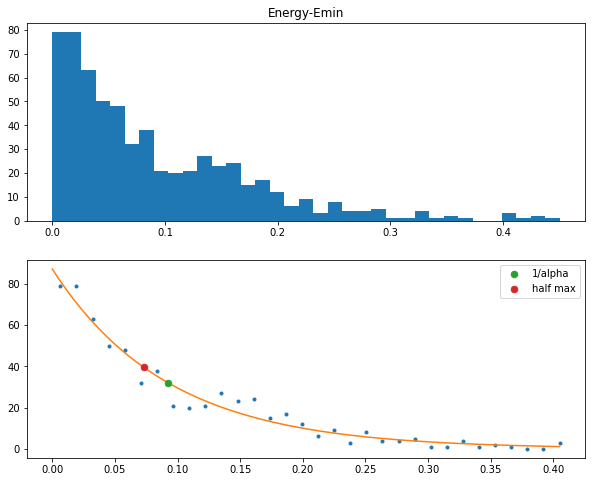

_____________________________________________________________________________
periodicBC_Emin0.99_density25_boxL5
total timesteps: 2120000


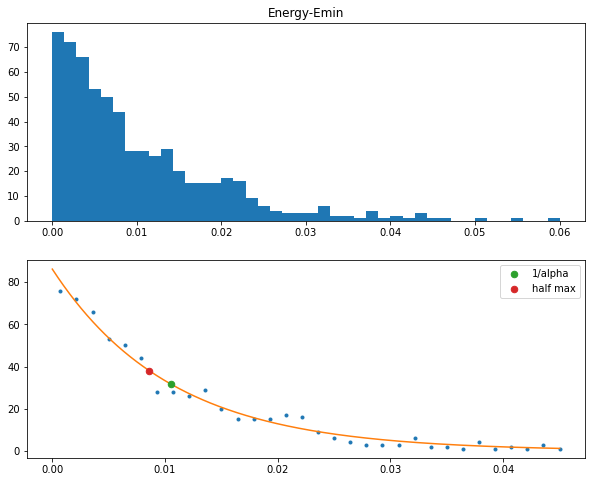

_____________________________________________________________________________
periodicBC_Emin0.97_density25_boxL5
total timesteps: 2380000


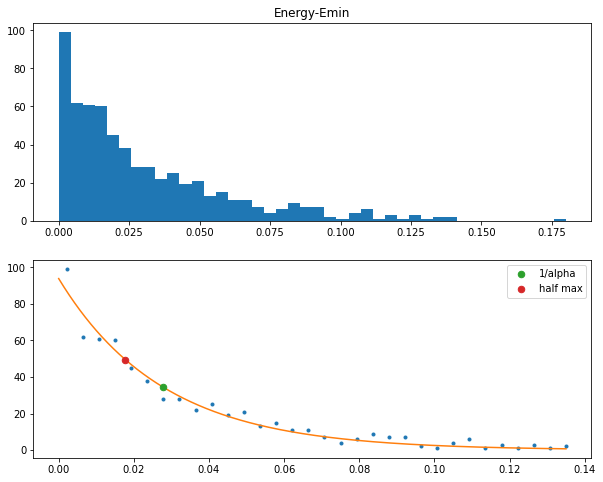

_____________________________________________________________________________
periodicBC_Emin0.89_density25_boxL5
total timesteps: 2100000


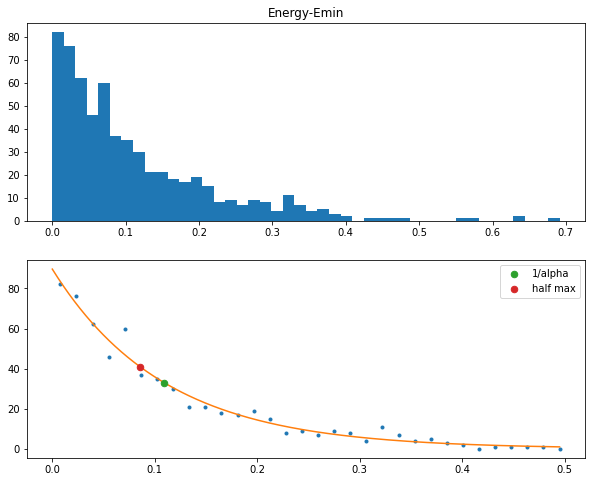

_____________________________________________________________________________
periodicBC_Emin0.95_density25_boxL5
total timesteps: 2320000


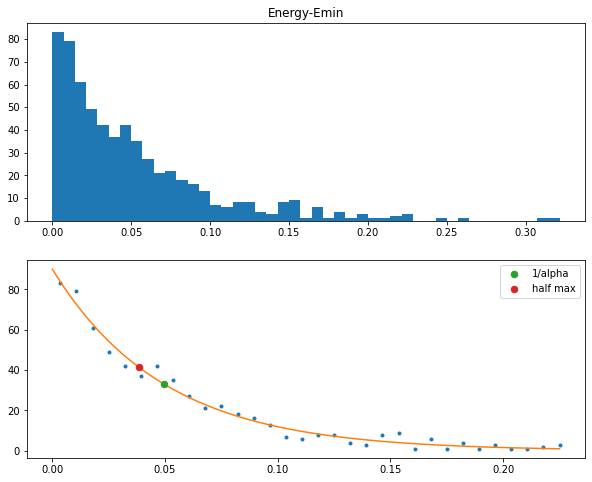

_____________________________________________________________________________
periodicBC_Emin0.999_density25_boxL5
total timesteps: 2220000


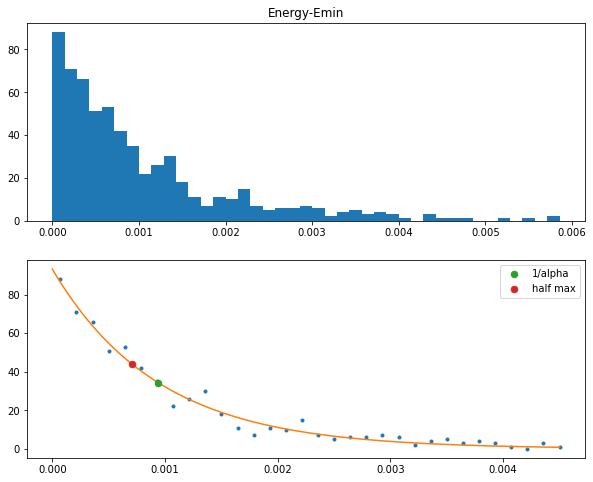

_____________________________________________________________________________
periodicBC_Emin0.85_density25_boxL5
total timesteps: 1540000


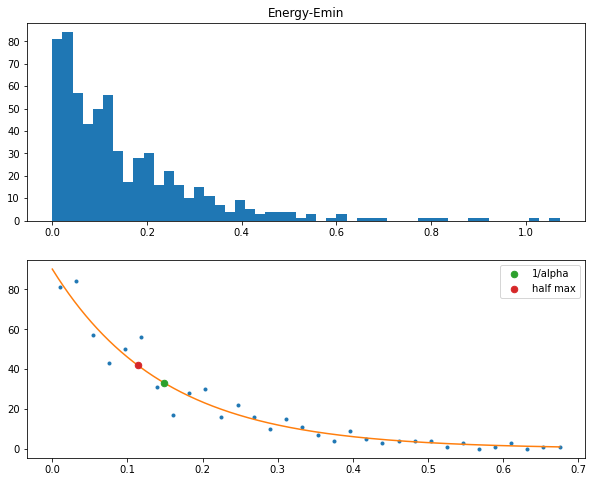

_____________________________________________________________________________
periodicBC_Emin0.93_density25_boxL5
total timesteps: 2220000


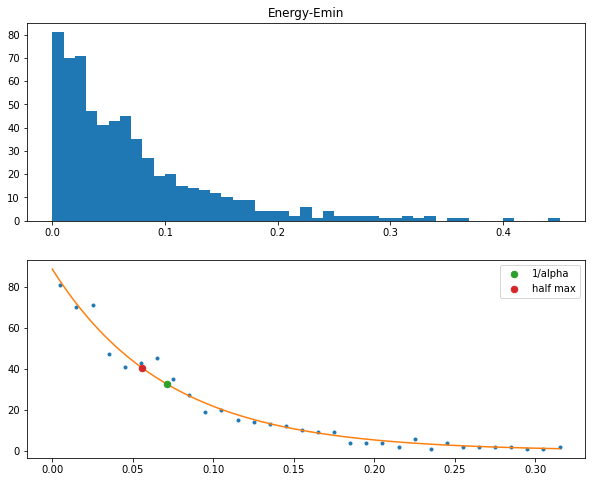

_____________________________________________________________________________


In [124]:
verbose=True

directory = 'varyEmin'
fnameBases = os.listdir(directory)

data = {}

i=0
for fnameBase in fnameBases:
    try:
        if os.path.isdir('./'+directory+'/'+fnameBase):
            parameters,quantities = loadData_andAnalyze(directory,fnameBase, verbose=verbose)
            
            for p in parameters:
                if i ==0:
                    data[p]=[]
                data[p] = np.append(parameters[p],data[p])

            for q in quantities:
                if i ==0:
                    data[q]=[]
                data[q] = np.append(quantities[q],data[q])
            i+=1
        else:
            pass

    except KeyError:
        pass
    except UnboundLocalError:
        pass  

0.9976803274092931 0.006463497953793406


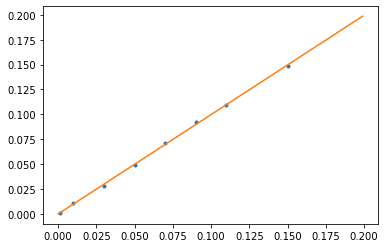

In [114]:
# Emin to width of Fermi distribution

Emin = data['Emin']
widths = data['widthOfFermi']

fermiWidth_fit = lambda Energy,a: a*Energy
popt,pcov = opt.curve_fit(fermiWidth_fit, (1-Emin), widths)
[a]=popt
[a_err]=np.sqrt(np.diag(pcov))

Emin_range = np.arange(0, .2, .001)
plt.plot((1-data['Emin']),data['widthOfFermi'], '.')
plt.plot(Emin_range, fermiWidth_fit(Emin_range, a))

#display(Latex(f'$\frac{{k_bT}}{{E_f}(E_{{min}})= e^{-a}E_{{{min}}}^{{{b}}}$'))
print(a,a_err)

In [261]:
# emin power law

Emin = data['Emin']
ee_MFP_varyEmin = data['ee_MFP']
varyEmin_std = data['ee_MFP_std']

<IPython.core.display.Latex object>

power law uncertainty= 0.011097276137409007


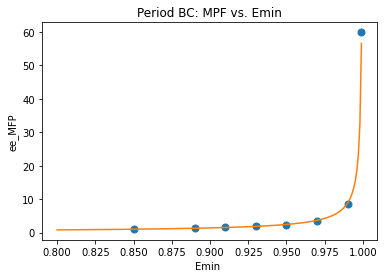

In [706]:
plt.plot(Emin, ee_MFP_varyEmin, '.', markersize=14)
plt.xlabel('Emin ')
plt.ylabel('ee_MFP')
plt.title('Period BC: MPF vs. Emin')

Emin_fit = lambda Emin,alpha,power,: alpha*(1-Emin)**power
popt,pcov = opt.curve_fit(Emin_fit, Emin, ee_MFP_varyEmin, sigma=varyEmin_std)
[Ealpha,Epower]=popt
[Ealpha_error,Epower_error]=np.sqrt(np.diag(pcov))

Emin_range = np.arange(0.8, 1, .001)
plt.plot(Emin_range, Emin_fit(Emin_range, Ealpha, Epower))

display(Latex(f'$l_{{ee}}(E_{{min}})= {round(Ealpha,2)} (1-E_{{min}})^{{{round(Epower,2)}}}$'))
print("power law uncertainty=", Epower_error)

In [710]:
# density power law

density = data['density']
ee_MFP_varyDensity = data['ee_MFP']
varyDensity_std = data['ee_MFP_std']

<IPython.core.display.Latex object>

power law uncertainty= 0.00034070514096383204


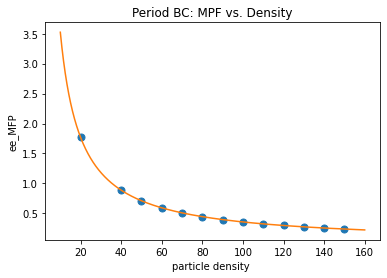

In [711]:
plt.plot(density, ee_MFP_varyDensity, '.', markersize=14)
plt.xlabel('particle density ')
plt.ylabel('ee_MFP')
plt.title('Period BC: MPF vs. Density')

density_fit = lambda density,alpha,power,: alpha*density**power
popt,pcov = opt.curve_fit(density_fit, density, ee_MFP_varyDensity, sigma=varyDensity_std)
[nAlpha,nPower]=popt
[nAlpha_error,nPower_error]=np.sqrt(np.diag(pcov))

n_range = np.arange(10, 160, .01)
plt.plot(n_range, density_fit(n_range, nAlpha,nPower))

display(Latex(f'$l_{{ee}}(n)= {round(nAlpha,2)} (n)^{{{round(nPower,2)}}}$'))
print("power law uncertainty=", nPower_error)

In [362]:
# lee(n, emin) constant of proportionality

ee_MFPs = np.append(ee_MFP_varyEmin,ee_MFP_varyDensity)
ee_MFPs_std = np.append(varyEmin_std,varyDensity_std)
Emins = np.append(Emin,np.ones(len(density))*.9)
densities = np.append(np.ones(len(Emin))*25, density)

EminDensityTerm = (1-Emins)**Epower/densities

plt.plot(EminDensityTerm[EminDensityTerm<4], ee_MFPsEminDensityTerm[EminDensityTerm<4], '.', markersize=14)
plt.xlabel('1/(deltaE^0.07 * n)')
plt.ylabel('ee_MFP')
plt.title('Period BC: MPF vs. Density')

constant_fit = lambda EminDensityTerm,slope: slope*EminDensityTerm
popt,pcov = opt.curve_fit(constant_fit, EminDensityTerm, ee_MFPs)#, sigma=ee_MFPs_std)
[slope]=popt
[slope_error]=np.sqrt(np.diag(pcov))

x_range = np.arange(np.min(EminDensityTerm), np.max(EminDensityTerm), .001)
plt.plot(x_range, constant_fit(x_range, slope))

display(Latex(f'$l_{{ee}}(E_{{min}},n)= {round(slope,2)} (1-E_{{min}})^{{{round(Epower,2)}}} (n)^{{{round(nPower,2)}}}$'))
print("slope uncertainty=", slope_error)
print("y-int=", lee0)

NameError: name 'ee_MFP_varyDensity' is not defined

(0.0, 6.0)

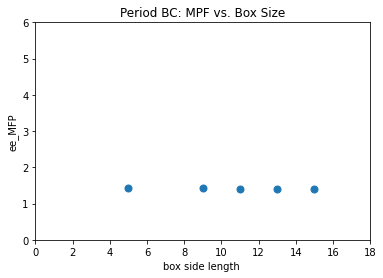

In [723]:
# vary boxL analysis

boxL = data['boxL']
ee_MFP_varyBoxL = data['ee_MFP']
plt.plot(boxL, ee_MFP_varyBoxL, '.', markersize=14)
plt.xlabel('box side length ')
plt.ylabel('ee_MFP')
plt.title('Period BC: MPF vs. Box Size')
plt.xlim(0,18)
plt.ylim(0,6)

In [725]:
# fitting eq. error

density_varyBoxL= data['density']
Emin_varyBoxL = data['Emin']
ee_MFP_varyBoxL = data['ee_MFP']

In [726]:
ee_MFPs = np.append(ee_MFPs,ee_MFP_varyBoxL)
boxLs = np.append(5*np.ones(len(Emins)), boxL)
Emins = np.append(Emins,Emin_varyBoxL)
densities = np.append(densities, density_varyBoxL)

(-0.5, 0.5)

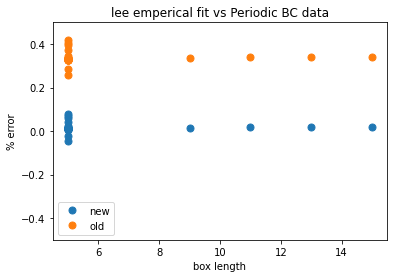

In [731]:
def lee_empiricalFitNEW(density, Emin):
    
    lee = 5.7/density/(1-Emin)**0.8
    return lee

leeFitNEW = lee_empiricalFitNEW(densities, Emins)
fitErrorNEW = (leeFitNEW-ee_MFPs)/ee_MFPs

def lee_empiricalFitOLD(density, Emin):
    
    lee = 7.5/density/(1-Emin)**0.8
    return lee

leeFitOLD = lee_empiricalFitOLD(densities, Emins)
fitErrorOLD = (leeFitOLD-ee_MFPs)/ee_MFPs

plt.plot(boxLs, fitErrorNEW, '.', markersize=14, label='new')
plt.plot(boxLs, fitErrorOLD, '.', markersize=14, label='old')
plt.xlabel('box length')
plt.ylabel('% error')
plt.title('lee emperical fit vs Periodic BC data')
plt.legend()
plt.ylim(-.5,.5)

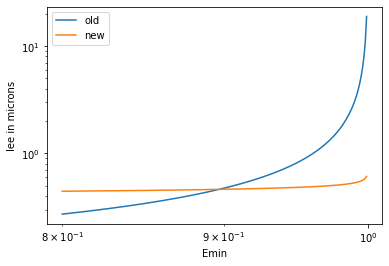

In [595]:
xEmin= np.arange(.8,1,.001)
plt.loglog(xEmin, lee_empiricalFitOLD(100, xEmin), label='old')
plt.loglog(xEmin, lee_empiricalFitNEW(100, xEmin), label='new')
plt.xlabel('Emin')
plt.ylabel('lee in microns')
plt.legend()

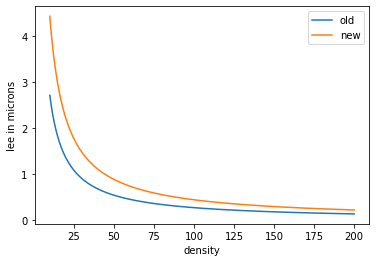

In [601]:
xDens= np.arange(10,200,.01)
plt.plot(xDens, lee_empiricalFitOLD(xDens, .8), label='old')
plt.plot(xDens, lee_empiricalFitNEW(xDens, .8), label='new')
plt.xlabel('density')
plt.ylabel('lee in microns')
plt.legend()

In [646]:
a= np.array([1])

In [647]:
np.append(a, 1)

array([1, 1])

In [315]:
np.exp(-2)

0.1353352832366127